In [1]:

###############################################################################
#                          1. Importing Libraries                             #
###############################################################################

import numpy as np
# The usual stuff
import pandas as pd
# To measure performance
from sklearn import metrics
# Iris dataset
from sklearn.datasets import load_iris
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
# Data preprocessing and machine learning
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
#Results
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.metrics import classification_report, accuracy_score


def show_results(y_test, y_pred):
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d")
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print ('Accuracy: {}%'.format(accuracy_score(y_test, y_pred)*100))
    print (classification_report(y_test, y_pred, zero_division=0))

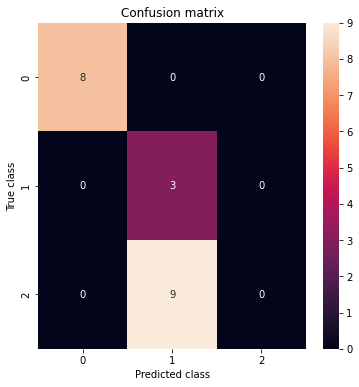

Accuracy: 55.00000000000001%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.25      1.00      0.40         3
           2       0.00      0.00      0.00         9

    accuracy                           0.55        20
   macro avg       0.42      0.67      0.47        20
weighted avg       0.44      0.55      0.46        20



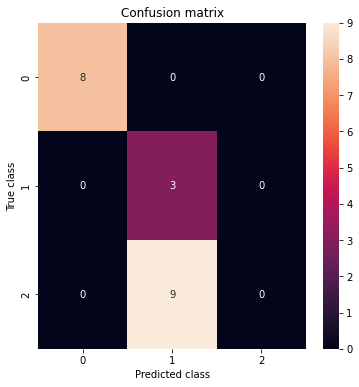

Accuracy: 55.00000000000001%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.25      1.00      0.40         3
           2       0.00      0.00      0.00         9

    accuracy                           0.55        20
   macro avg       0.42      0.67      0.47        20
weighted avg       0.44      0.55      0.46        20



In [3]:
###############################################################################
#                 2. Stump vs Ensemble of 1000 Decision Stumps                #
###############################################################################

# Load data and store it into pandas DataFrame objects
iris = load_iris()
X = pd.DataFrame(iris.data[:, :], columns=iris.feature_names[:])
y = pd.DataFrame(iris.target, columns=["Species"])

# Splitting Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, random_state=100)

# Defining the stump
stump = DecisionTreeClassifier(max_depth=1)

# Creating an ensemble
ensemble = BaggingClassifier(base_estimator=stump, n_estimators=1000,
                             bootstrap=False)

# Training classifiers
stump.fit(X_train, np.ravel(y_train))
ensemble.fit(X_train, np.ravel(y_train))

# Making predictions
y_pred_stump = stump.predict(X_test)
y_pred_ensemble = ensemble.predict(X_test)

# Determine performance
show_results(y_test, y_pred_stump)
show_results(y_test, y_pred_ensemble)


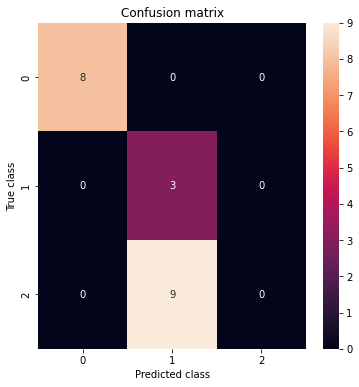

Accuracy: 55.00000000000001%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.25      1.00      0.40         3
           2       0.00      0.00      0.00         9

    accuracy                           0.55        20
   macro avg       0.42      0.67      0.47        20
weighted avg       0.44      0.55      0.46        20



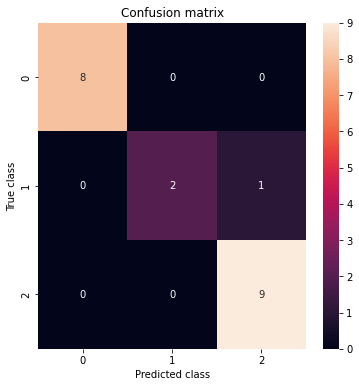

Accuracy: 95.0%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.67      0.80         3
           2       0.90      1.00      0.95         9

    accuracy                           0.95        20
   macro avg       0.97      0.89      0.92        20
weighted avg       0.96      0.95      0.95        20



In [4]:
from sklearn.ensemble import RandomForestClassifier

###############################################################################
#                          3. Stump vs Random Forest                          #
###############################################################################

# Defining the stump
stump = DecisionTreeClassifier(max_depth=1, splitter="best", max_features="sqrt")

# Create Random Forest
ensemble = RandomForestClassifier(n_estimators=1000, bootstrap=True)

# Training classifiers
stump.fit(X_train, np.ravel(y_train))
ensemble.fit(X_train, np.ravel(y_train))

# Making predictions
y_pred_tree = stump.predict(X_test)
y_pred_ensemble = ensemble.predict(X_test)

# Determine performance
show_results(y_test, y_pred_stump)
show_results(y_test, y_pred_ensemble)

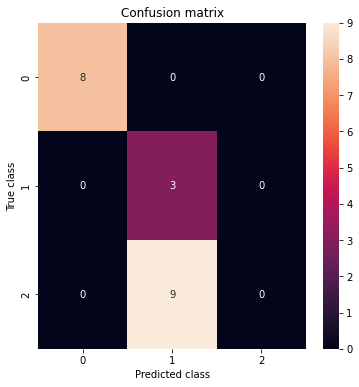

Accuracy: 55.00000000000001%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.25      1.00      0.40         3
           2       0.00      0.00      0.00         9

    accuracy                           0.55        20
   macro avg       0.42      0.67      0.47        20
weighted avg       0.44      0.55      0.46        20



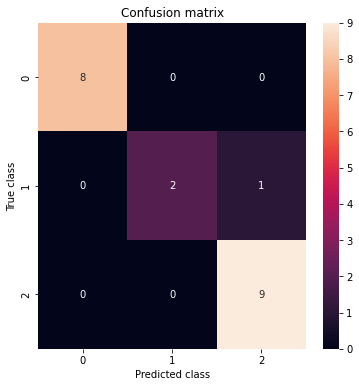

Accuracy: 95.0%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.67      0.80         3
           2       0.90      1.00      0.95         9

    accuracy                           0.95        20
   macro avg       0.97      0.89      0.92        20
weighted avg       0.96      0.95      0.95        20



In [5]:
###############################################################################
#                            4. Stump vs Extra Trees                          #
###############################################################################

# Defining the stump
stump = DecisionTreeClassifier(max_depth=1, splitter="random", max_features="sqrt")

#.values will give the values in an array. (shape: (n,1) / .ravel will convert that array shape to (n, ) / ref: https://stackoverflow.com/questions/34165731/a-column-vector-y-was-passed-when-a-1d-array-was-expected
ensemble = ExtraTreesClassifier(n_estimators=1000, bootstrap=False)

# Training classifiers
stump.fit(X_train, np.ravel(y_train))
ensemble.fit(X_train, np.ravel(y_train))

# Making predictions
y_pred_tree = stump.predict(X_test)
y_pred_ensemble = ensemble.predict(X_test)

# Determine performance
show_results(y_test, y_pred_stump)
show_results(y_test, y_pred_ensemble)